In [1]:
import uproot
from pathlib import Path
import awkward as ak
import numpy as np
import matplotlib as mpl
mpl.rcParams['font.size'] = 20
import matplotlib.pyplot as plt

In [2]:
fname = Path("/Users/alexandertuna/Downloads/cms/lst_playing/data/LSTNtuple.PU200.gnn_ntuple.cut_value.root")
if not fname.exists():
    raise Exception("shit")

In [3]:
tree = uproot.open(f"{fname}:tree")
print(tree)

<TTree 'tree' (201 branches) at 0x000114f981a0>


In [4]:
def get_prefixes(col):
    return sorted(list(set([obj.split("_")[0] for obj in col])))
print(get_prefixes(tree.keys()))

['LS', 'MD', 'md', 'module', 'pLS', 'pT3', 'pT5', 'sg', 'sim', 't3', 't5', 'tc']


In [5]:
data = tree.arrays([
    'MD_0_r', 'MD_0_x', 'MD_0_y', 'MD_0_z',
    'MD_1_r', 'MD_1_x', 'MD_1_y', 'MD_1_z',
])

625539
630110


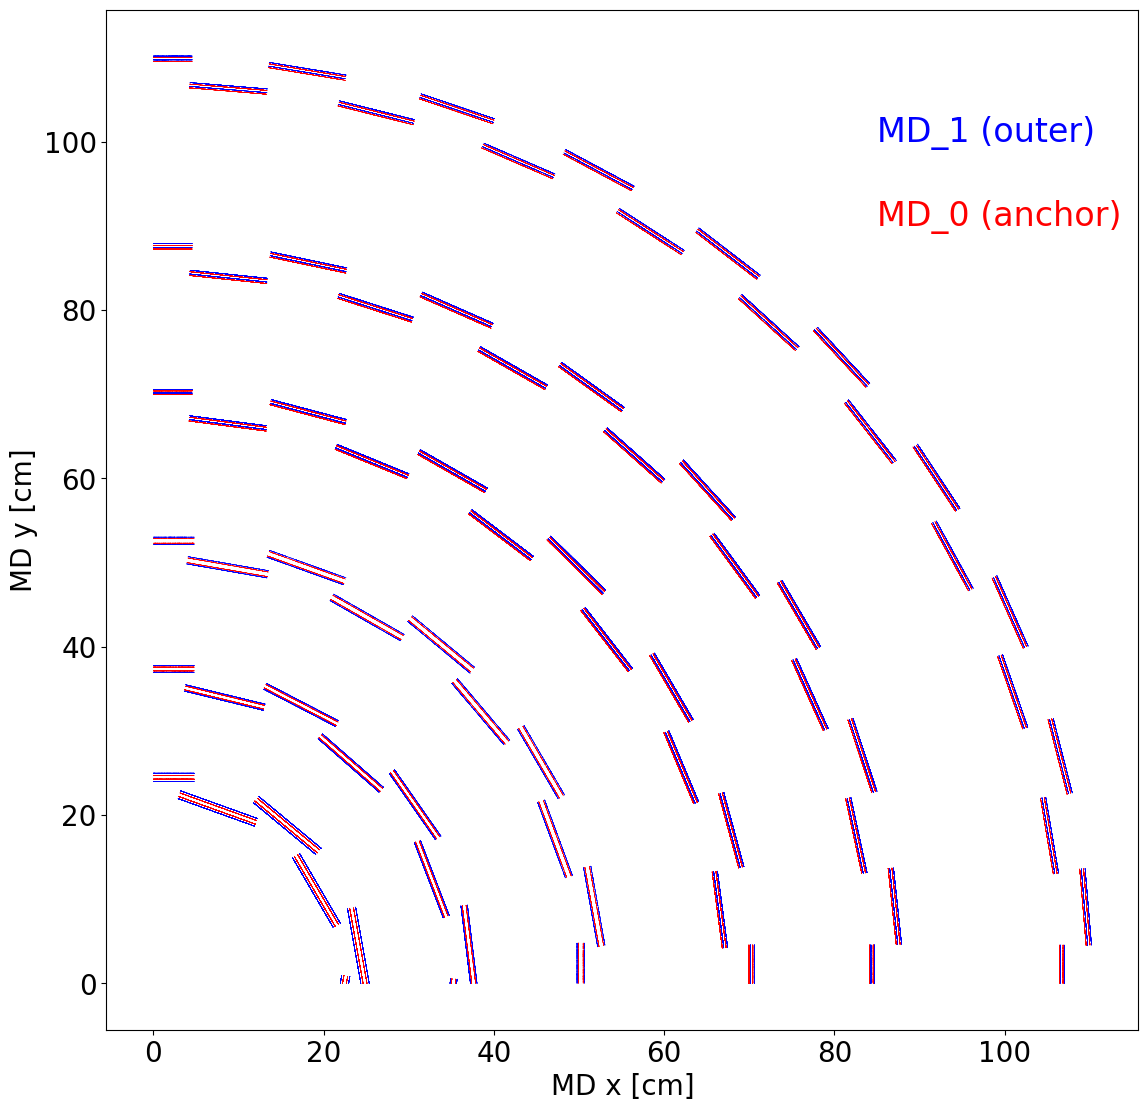

In [6]:
fig, ax = plt.subplots(figsize=(12, 12))
fig.subplots_adjust(bottom=0.10, left=0.10, right=0.96, top=0.95)
x0s = ak.flatten(data.MD_0_x).to_numpy()
y0s = ak.flatten(data.MD_0_y).to_numpy()
z0s = ak.flatten(data.MD_0_z).to_numpy()
r0s = ak.flatten(data.MD_0_r).to_numpy()
x1s = ak.flatten(data.MD_1_x).to_numpy()
y1s = ak.flatten(data.MD_1_y).to_numpy()
z1s = ak.flatten(data.MD_1_z).to_numpy()
r1s = ak.flatten(data.MD_1_r).to_numpy()
edge = 120 # 60 # 40 # 26
mask0 = (x0s > 0) & (x0s < edge) & (y0s > 0) & (y0s < edge) & (((z0s < 15) & (z0s > -15)) | ((r0s > 60) & (z0s < 120) & (z0s > -120)))
mask1 = (x1s > 0) & (x1s < edge) & (y1s > 0) & (y1s < edge) & (((z1s < 15) & (z1s > -15)) | ((r1s > 60) & (z1s < 120) & (z1s > -120)))
print(np.sum(mask0))
print(np.sum(mask1))
_ = ax.scatter(x0s[mask0], y0s[mask0], s=0.5, c="red", marker=".", edgecolors="none")
_ = ax.scatter(x1s[mask1], y1s[mask1], s=0.5, c="blue", marker=".", edgecolors="none")
ax.set_xlabel("MD x [cm]")
ax.set_ylabel("MD y [cm]")
ax.text(85, 90, "MD_0 (anchor)", color="red", size=24)
ax.text(85, 100, "MD_1 (outer)", color="blue", size=24)
plt.savefig("md_xy.png")